In [1]:
import uproot as ur
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import mplhep as hep
hep.style.use("CMS")

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'
plt.rcParams['legend.frameon']=True
plt.rcParams['legend.edgecolor']='white'
import uproot,glob,ROOT

from scipy.optimize import curve_fit

plt.rcParams["figure.figsize"] = (10, 8)

import gc

Welcome to JupyROOT 6.28/04


In [39]:
input_file=ROOT.TFile("D0bar_lcp_sim_tuples_summed.root")
h_nu=input_file.Get("nu")
h_nu_mc=input_file.Get("nu MC")
print(input_file)

Name: D0bar_lcp_sim_tuples_summed.root Title: 


number of events: 96000.0
electron efficiency=0.65
electron efficiency (estimated for 10.2 GeV beam)=0.58


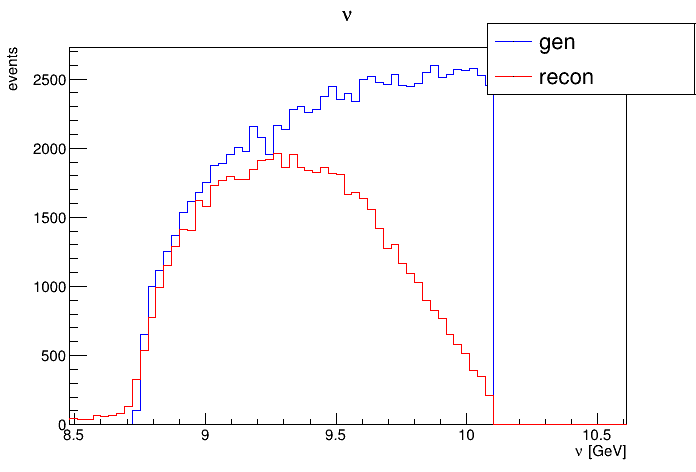

In [40]:
c1=ROOT.TCanvas()
ROOT.gStyle.SetOptStat(0)
h_nu_mc.SetLineColor(ROOT.kBlue)
h_nu_mc.GetXaxis().SetRangeUser(8.5, 10.6)
h_nu_mc.Draw()
h_nu_mc.SetTitle("#nu;#nu [GeV];events")
h_nu.SetLineColor(ROOT.kRed)
h_nu.Draw("SAME")
legend=ROOT.TLegend(0.7, 0.8, 1,0.95)
legend.AddEntry(h_nu_mc, "gen")
legend.AddEntry(h_nu, "recon")
legend.Draw("SAME")
print("number of events:", h_nu_mc.GetEntries())
print(f"electron efficiency={h_nu.GetEntries()/h_nu_mc.GetEntries():.2f}")
#for the spring 2019 data, the data were taken at 10.2 GeV beam, so the efficiency as a function of nu would be shifted
# by 400 MeV
i=h_nu.GetXaxis().FindBin(8.7+0.4)
print(f"electron efficiency (estimated for 10.2 GeV beam)={h_nu.Integral(i,-1)/h_nu_mc.Integral(i,-1):.2f}")
c1.Draw()

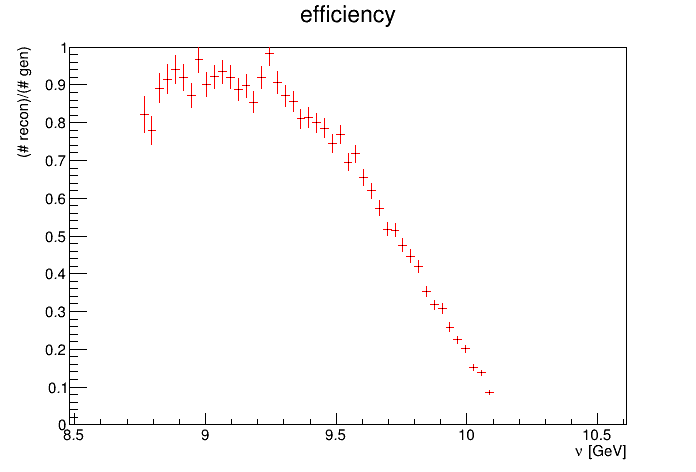

In [41]:
c1=ROOT.TCanvas()
ROOT.gStyle.SetOptStat(0)
n=h_nu.Clone()
d=h_nu_mc.Clone()
n.Sumw2()
d.Sumw2()
n.Divide(d)
n.Draw()
n.GetYaxis().SetRangeUser(0,1)
n.SetTitle("efficiency;#nu [GeV];(# recon)/(# gen)")
n.GetXaxis().SetRangeUser(8.5, 10.6)

c1.Draw()

(0.0, 0.633910569000947)

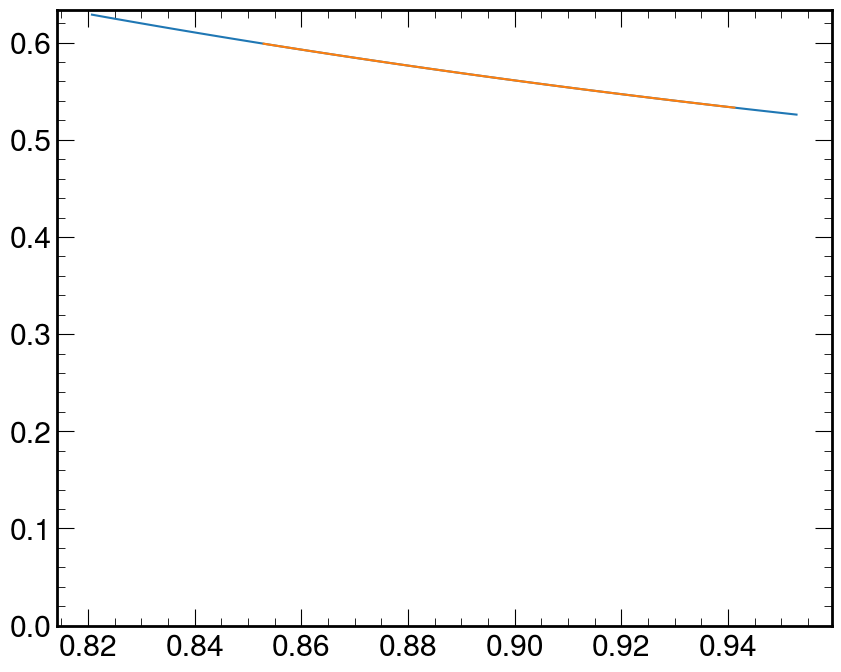

In [42]:

y=np.linspace(8.7, 10.1, 100)/10.6
plt.plot(y, (1-y+1/2*y**2)/y)
plt.ylim(0)

y=np.linspace(8.7, 9.6, 100)/10.2
plt.plot(y, (1-y+1/2*y**2)/y)
plt.ylim(0)

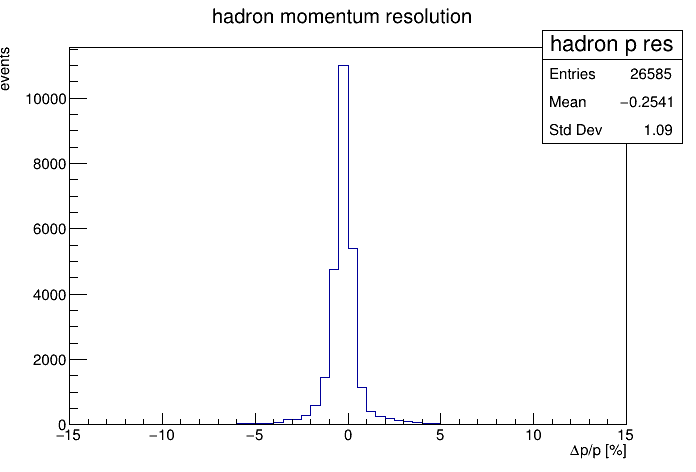

In [43]:
#input_file=ROOT.TFile("D0bar_lcp_sim_tuples_0.root")
c1=ROOT.TCanvas()
h=input_file.Get("hadron p res")
h.SetTitle("hadron momentum resolution;#Deltap/p [%];events")
ROOT.gStyle.SetOptStat(1)
h.GetXaxis().SetRangeUser(-15,15)
#fnc=ROOT.TF1("f1","gaus", -5,5)
#pres.Fit(fnc)
h.Draw()
c1.Draw()

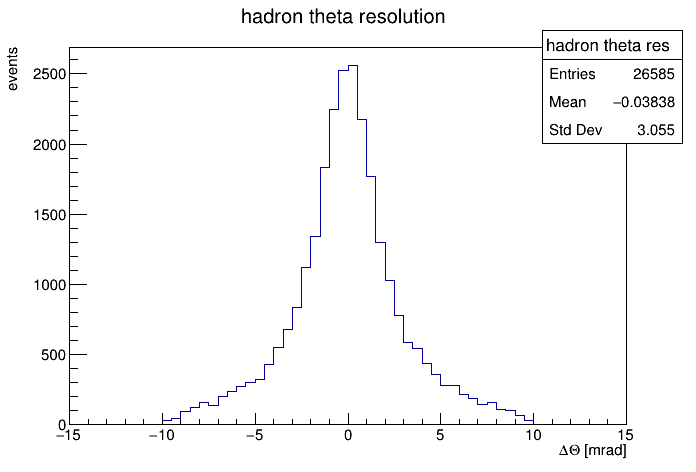

In [44]:
c1=ROOT.TCanvas()
h=input_file.Get("hadron theta res")

h.SetTitle("hadron theta resolution;#Delta#Theta [mrad];events")
ROOT.gStyle.SetOptStat(1)
#fnc=ROOT.TF1("f1","gaus", -10,10)
#pres.Fit(fnc)
h.GetXaxis().SetRangeUser(-15,15)
h.Draw()
c1.Draw()

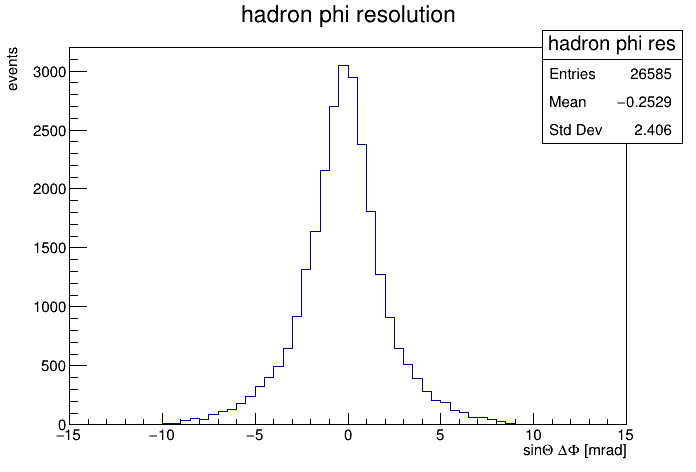

In [45]:
c1=ROOT.TCanvas()
h=input_file.Get("hadron phi res")
ROOT.gStyle.SetOptStat(1)

#fnc=ROOT.TF1("f1","gaus", -10,10)
#pres.Fit(fnc)

h.SetTitle("hadron phi resolution;sin#Theta #Delta#Phi [mrad];events")
h.GetXaxis().SetRangeUser(-15,15)
h.Draw()
c1.Draw()

In [46]:
db=ROOT.TDatabasePDG()

In [47]:
def make_mass_resolution_plot(histname, title, expected_mass, table=None):
    c=ROOT.TCanvas()
    c.SetName(histname+"_c")
    ROOT.gStyle.SetOptStat(0)
    ROOT.gStyle.SetOptFit(1)
    h=input_file.Get(histname)#.Clone()
    #h.Sumw2()
    #h.Scale(1/(h.GetXaxis().GetBinCenter(1)-h.GetXaxis().GetBinCenter(0)))
    h.SetTitle(title)
    w=0.3
    fnc=ROOT.TF1("f1","gausn+pol1(3)", expected_mass-w,expected_mass+w)
    fnc.SetParName(0, "A")
    fnc.SetParName(1, "#mu")
    fnc.SetParName(2, "#sigma")
    fnc.SetParName(3, "c_{0}")
    fnc.SetParName(4, "c_{1}")
    h.GetXaxis().SetRangeUser(expected_mass-w,expected_mass+w)
    fnc.SetParameter(0, 100)
    fnc.SetParameter(1,expected_mass)
    fnc.SetParameter(2, 0.015)
    
    h.Fit(fnc, "R")
    binwidth=h.GetXaxis().GetBinCenter(1)-h.GetXaxis().GetBinCenter(0)
    print("integral:", fnc.GetParameter(0)/binwidth)
    tot_events=input_file.Get("nu MC").GetEntries()
    eff=fnc.GetParameter(0)/binwidth/tot_events
    deff=fnc.GetParError(0)/binwidth/tot_events
    print(f"efficiency: {eff:.4f}+-{deff:.4f}")
    if table is not None:
        table['eff']=eff
        table['sigma']=fnc.GetParameter(2)
        table['dsigma']=fnc.GetParError(2)
    line=ROOT.TLine()
    line.SetLineColor(ROOT.kGreen+2)
    line.DrawLine(expected_mass, 0, expected_mass, h.GetMaximum())
    c.Draw()
    return c

integral: 495.5300705505141
efficiency: 0.0052+-0.0002
 FCN=63.0136 FROM MIGRAD    STATUS=CONVERGED     207 CALLS         208 TOTAL
                     EDM=3.73849e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A            2.47765e+00   1.14238e-01   4.43010e-04   1.16962e-03
   2  #mu          1.86057e+00   5.42547e-04   2.10837e-06   3.52062e-01
   3  #sigma       1.14637e-02   5.51332e-04   2.11271e-06   3.25799e-02
   4  c_{0}        2.36025e+00   2.00762e+00   6.40843e-04  -5.66118e-04
   5  c_{1}       -4.41380e-01   1.11311e+00   3.54967e-04  -9.24216e-04


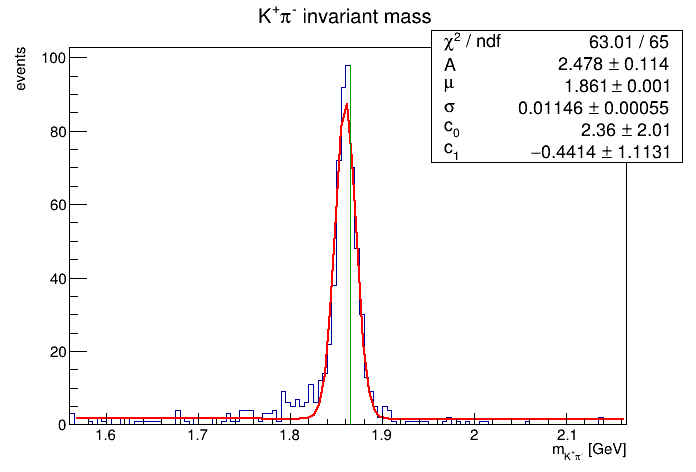

In [48]:
c=make_mass_resolution_plot("Kp_pim_invmass", "K^{+}#pi^{-} invariant mass; m_{K^{+}#pi^{-}} [GeV]; events", 
                          db.GetParticle("D0").Mass())
#c.Show()

integral: 497.94544312523163
efficiency: 0.0052+-0.0002
 FCN=95.678 FROM MIGRAD    STATUS=CONVERGED     161 CALLS         162 TOTAL
                     EDM=1.29442e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A            4.97945e+00   2.29192e-01   1.09349e-03   8.26777e-06
   2  #mu          2.29248e+00   8.17621e-04   3.90735e-06  -5.87699e-02
   3  #sigma       1.73170e-02   8.52271e-04   4.03466e-06   5.89504e-01
   4  c_{0}       -4.00798e+00   2.46671e+00   1.06459e-03  -5.34738e-05
   5  c_{1}        2.75288e+00   1.08467e+00   4.68060e-04  -1.91696e-04


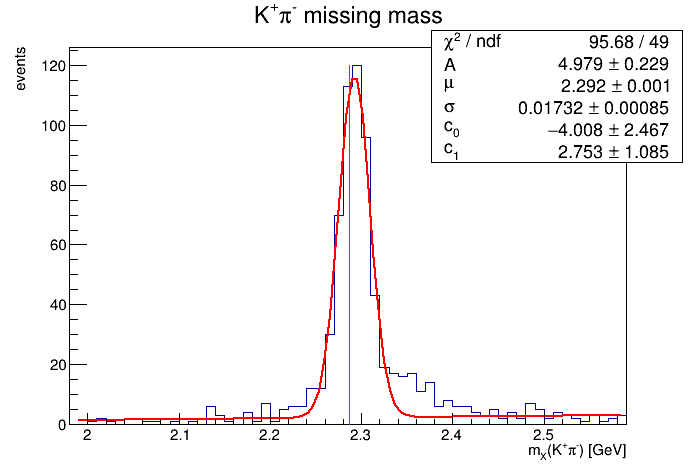

In [49]:
c=make_mass_resolution_plot("Kp_pim_missmass", "K^{+}#pi^{-} missing mass; m_{X}(K^{+}#pi^{-}) [GeV]; events", 
                          db.GetParticle("Lambda_c+").Mass())

integral: 97.61329589898054
efficiency: 0.0010+-0.0001
 FCN=23.6048 FROM MIGRAD    STATUS=CONVERGED     253 CALLS         254 TOTAL
                     EDM=1.29109e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   0.1 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A            4.88066e-01   5.26141e-02  -6.65616e-05   1.68858e-03
   2  #mu          2.28398e+00   8.22266e-04  -2.08543e-06   8.48129e-02
   3  #sigma       6.89645e-03   5.89112e-04   9.82152e-07  -3.28957e-01
   4  c_{0}        1.27930e+00   2.52217e+00   3.87503e-05  -3.06321e-04
   5  c_{1}        4.30319e-03   1.07348e+00  -1.14092e-05  -7.13182e-04


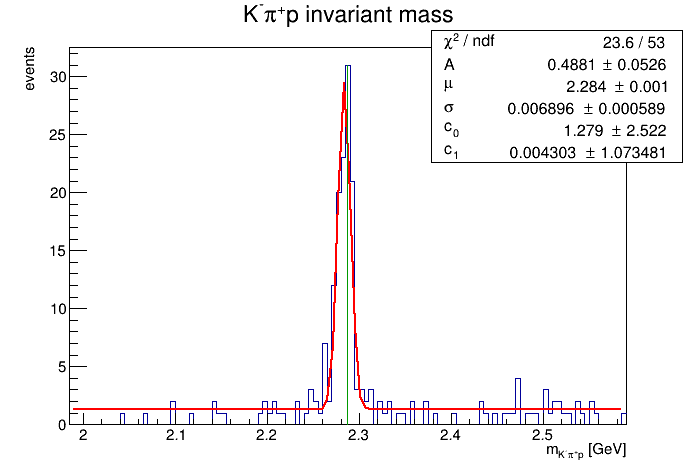

In [50]:
c=make_mass_resolution_plot("Km_pip_p_invmass", "K^{-}#pi^{+}p invariant mass; m_{K^{-}#pi^{+}p} [GeV]; events", 
                          db.GetParticle("Lambda_c+").Mass())

integral: 109.63720967513926
efficiency: 0.0011+-0.0001
 FCN=9.23135 FROM MIGRAD    STATUS=CONVERGED     183 CALLS         184 TOTAL
                     EDM=3.39663e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.9 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A            1.09637e+00   1.10976e-01   2.61791e-04  -1.80206e-05
   2  #mu          1.86724e+00   1.63967e-04   2.07885e-07  -2.01170e+01
   3  #sigma       1.35804e-02   1.22906e-03  -1.53509e-06  -2.66214e+00
   4  c_{0}        1.80608e+00   2.55042e+00  -6.34074e-04   3.79652e-04
   5  c_{1}       -2.95070e-01   1.37931e+00   5.17108e-04   6.61745e-04


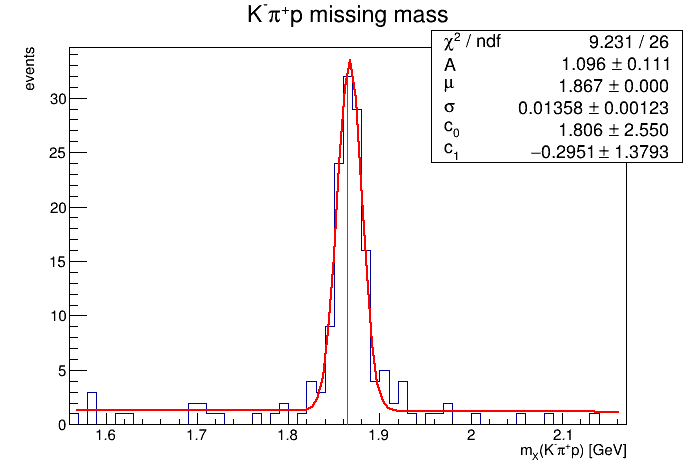

In [51]:
c=make_mass_resolution_plot("Km_pip_p_missmass", "K^{-}#pi^{+}p missing mass; m_{X}(K^{-}#pi^{+}p) [GeV]; events", 
                          db.GetParticle("D0").Mass())

In [52]:
events=input_file.Get("events")

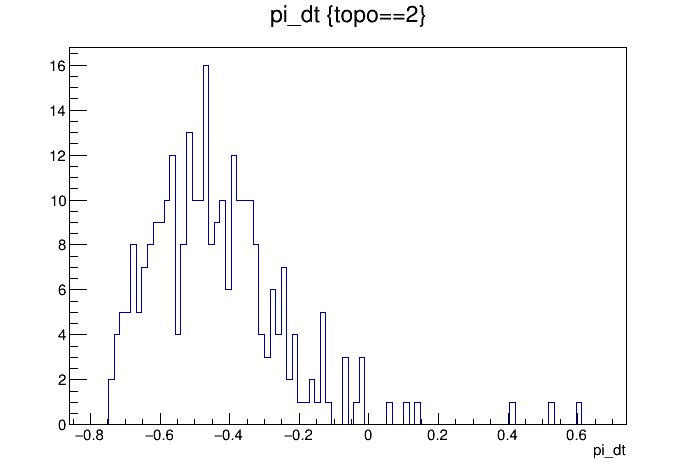

In [57]:
c=ROOT.TCanvas()
events.Draw("pi_dt", "topo==2", "COLZ")
c.Draw()

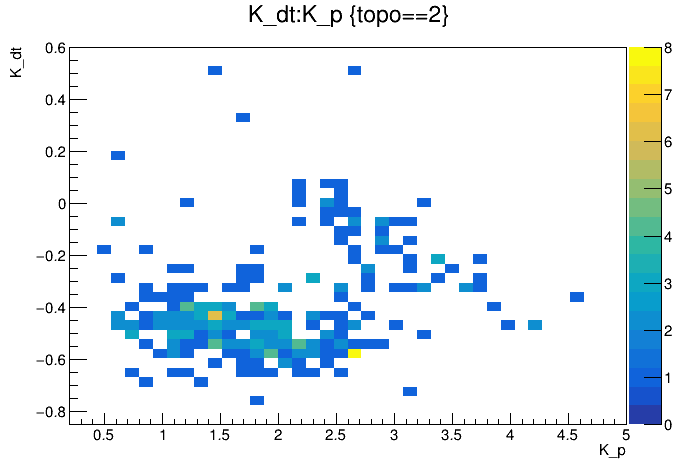

In [61]:
c=ROOT.TCanvas()
events.Draw("K_dt:K_p", "topo==2", "COLZ")
c.Draw()

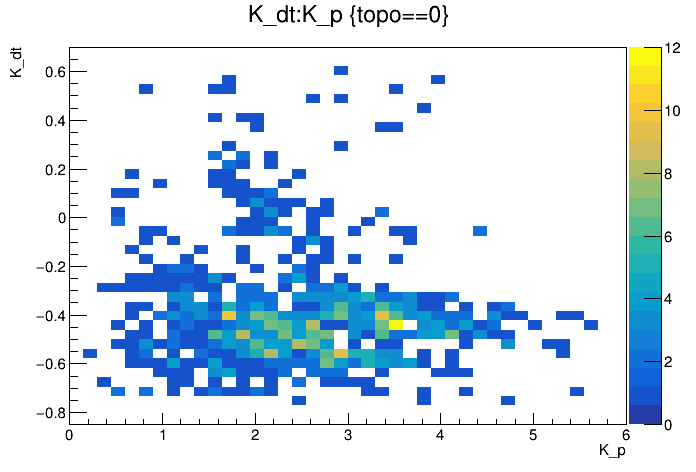

In [64]:
c=ROOT.TCanvas()
events.Draw("K_dt:K_p", "topo==0", "COLZ")
c.Draw()